In [1]:
import numpy as np
import jax
import jax.numpy as jnp
from  matplotlib import pyplot as plt

In [357]:
#TODO: think properly about inputs-outputs.

def rand_volume(shape, dimensions, radius, sigma = 0.1):
    """Generate a random smoothed spherical volume

    Parameters
    ----------
    shape : 3 x 1 array
        Dimensions of the volume, in number of elements
    dimensions: 3 x 1 array
        Dimensions of the volume, in units (e.g. Angst?)
    radius: float
        Radius of spherical object
    sigma: float
        Sigma for the Gaussian window 

    Returns
    -------
    vol
        the volume
    """
    
    Nx, Ny, Nz = shape
    vol = np.random.randn(Nx, Ny, Nz) + 2
    #vol = np.ones(shape) + 5
    vol[vol < 0] = 0
    
    Lx, Ly, Lz = dimensions  
    dx, dy, dz = dimensions/shape # "pixel" size
    

    # By adjusting the interval by half a pixel on each side
    # we ensure the sampling locations are 
    # the centres of the pixels
    coords_x = np.linspace(-Lx/2 + dx/2, Lx/2 - dx/2, Nx)
    coords_y = np.linspace(-Ly/2 + dy/2, Ly/2 - dy/2, Ny)
    coords_z = np.linspace(-Lz/2 + dz/2, Lz/2 - dz/2, Nz) 
    X, Y, Z = np.meshgrid(coords_x, coords_y, coords_z)
    
    mask = create_mask(X, Y, Z, radius) 
    
    return low_pass_filter(mask*vol, X, Y, Z, sigma)

In [358]:
def create_mask(X, Y, Z, radius):    
    mask = np.ones(X.shape)
    r = np.sqrt(X**2 + Y**2 + Z**2)
    print(X.shape)
    print(radius)
    mask[r > radius] = 0
    return mask

In [359]:
def low_pass_filter(vol, X, Y, Z, sigma):
    gauss = np.exp(-(X**2 + Y**2 + Z**2)/(2*sigma))
    gauss = gauss/max(gauss.ravel())
    gauss = np.fft.fftshift(gauss)
    
    low_pass_vol = np.fft.ifftn(np.fft.fftn(vol) * gauss)
    return np.real(low_pass_vol)

In [368]:
def volume_fourier(vol, dimensions, shape_f = None):
    """Calculate the FFT of the volume and return the frequency coordinates

    Parameters
    ----------
    vol : 
        Volume in spatial domain
    dimensions: 3 x 1 array
        Spatial dimensions of the volume, in units (e.g. Angst?)
    shape_f: 3 x 1 array
        Shape of the Fourier volume

    Returns
    -------
    vol_f
        the Fourier volume
    X_f, Y_f, Z_f
        Fourier points
    """

    if shape_f == None:
        shape_f = vol.shape

    vol_f = np.fft.fftn(vol, shape_f)
    
    Nx, Ny, Nz = vol.shape
    Nx_f, Ny_f, Nz_f = shape_f
    dx, dy, dz = dimensions/vol.shape # "pixel" size
    
    x_freq = np.fft.fftfreq(Nx_f, dx)
    y_freq = np.fft.fftfreq(Ny_f, dy)
    z_freq = np.fft.fftfreq(Nz_f, dz)
    X_f, Y_f, Z_f = np.meshgrid(x_freq, y_freq, z_freq)
    
    return vol_f, X_f, Y_f, Z_f

In [369]:
nx = 129
shape = nx * np.ones(3, dtype=np.int32)
length = 5
dimensions = 5 * np.ones(3)
radius = 2
sigma = 1

v = rand_volume(shape, dimensions, radius, sigma)


(129, 129, 129)
2


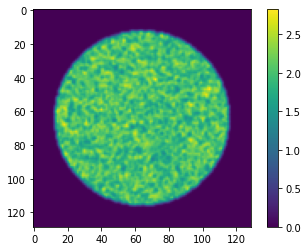

In [370]:
plt.imshow(v[:,:,int(np.floor(v.shape[2]/2))])
plt.colorbar()

In [376]:
v_f, X_f, Y_f, Z_f = volume_fourier(v, dimensions)
v_f.shape

(129, 129, 129)

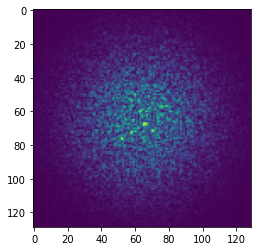

In [379]:
plt.imshow(np.fft.fftshift(abs(v_f[:,:,int(np.floor(v.shape[2]/2))])))


